## 1. import tensorflow & keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

Using TensorFlow backend.


## 2. MNISTデータを読込む

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. MNISTデータを加工する

In [3]:
# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

## 4. モデルの構築

In [4]:
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## 5. 学習

In [5]:
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.5971 - accuracy: 0.8525 - val_loss: 0.3395 - val_accuracy: 0.9085
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3309 - accuracy: 0.9075 - val_loss: 0.2987 - val_accuracy: 0.9178
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3018 - accuracy: 0.9154 - val_loss: 0.2859 - val_accuracy: 0.9196
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.2883 - accuracy: 0.9196 - val_loss: 0.2783 - val_accuracy: 0.9234
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.2805 - accuracy: 0.9217 - val_loss: 0.2762 - val_accuracy: 0.9242
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2746 - accuracy: 0.9230 - val_loss: 0.2735 - val_accuracy: 0.9249
Epoch 7/20
60000/60000 [==============================] - 1s 15us/st

## 6. 評価

In [6]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 20us/step

Test loss: 0.2725731672167778
Test accuracy: 0.9258999824523926


## 7. 可視化

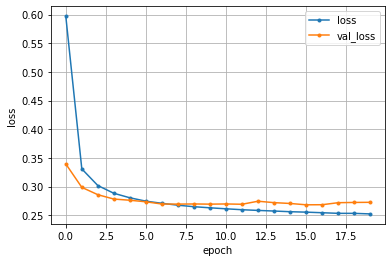

In [7]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()